### ***This code was usesd to create Fig S3 and S10***

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.25

In [ ]:
gcm_files = {
    2: "file_path_for_gcm2.csv",
    3: "file_path_for_gcm3.csv",
    4: "file_path_for_gcm4.csv",
    5: "file_path_for_gcm5.csv",
    6: "file_path_for_gcm6.csv",
    7: "file_path_for_gcm7.csv",
    8: "file_path_for_gcm8.csv",
    9: "file_path_for_gcm9.csv",
    10: "file_path_for_gcm10.csv",
    11: "file_path_for_gcm11.csv",
    12: "file_path_for_gcm12.csv",
    13: "file_path_for_gcm13.csv",
    14: "file_path_for_gcm14.csv",
    15: "file_path_for_gcm15.csv",
    16: "file_path_for_gcm16.csv",
    17: "file_path_for_full_gcm.csv"  
}

gcm_dfs = []

for gcm_number, file_path in gcm_files.items():
    df = pd.read_csv(file_path)
    df['number_of_gcm'] = gcm_number
    gcm_dfs.append(df)

gcm = pd.concat(gcm_dfs, ignore_index=True)
gcm["gcm"] = gcm["gcm"] * 100

In [ ]:
grouped = gcm.groupby('year')
year_dict = {year: data for year, data in grouped}

In [ ]:
for key in year_dict: 
    year_dict[key] = year_dict[key][["gcm", "code", "number_of_gcm"]]

In [ ]:
avg_dict = {}

for key in year_dict:
    avg_dict[key] = year_dict[key].groupby(["code", "number_of_gcm"])["gcm"].mean().reset_index()

In [ ]:
gcm_avg = gcm.groupby(["code", "number_of_gcm"])["gcm"].mean().reset_index()

In [ ]:
year_avg = gcm.groupby(["year", "number_of_gcm"])["gcm"].mean().reset_index()

#### ***Make line plto***

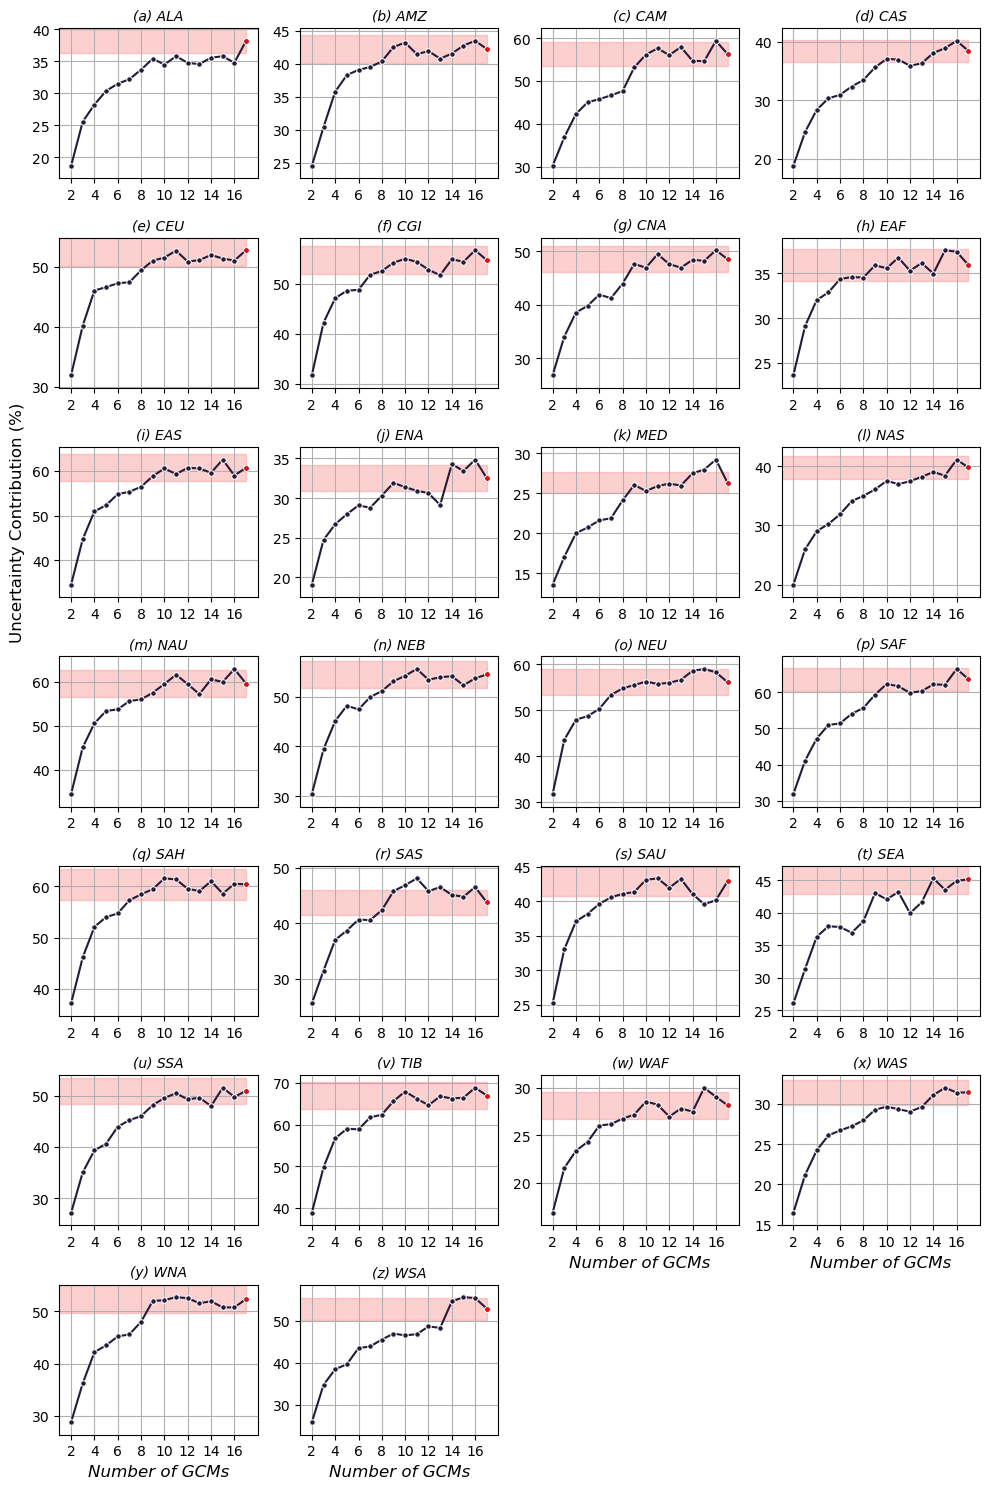

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

#regions_drop = ["AMZ", "CGI", "NAS", "SSA", "SAF", "NAU"] # For Fig S3, use this line
regions_drop = [] # For Fig S10, use this line
regions = gcm_avg["code"].unique() 
regions = [item for item in regions if item not in regions_drop]
num_regions = len(regions)
num_cols = 4
num_rows = (num_regions + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15), sharex=False, sharey=False) 
axes = axes.flatten()
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)', '(q)', '(r)', '(s)', '(t)', '(u)', '(v)', '(w)', '(x)', '(y)', '(z)']

for i, (ax, region) in enumerate(zip(axes, regions)):
    region_data = gcm_avg[gcm_avg['code'] == region]
    
    sns.lineplot(data=region_data, x='number_of_gcm', y='gcm', marker='o', ax=ax, markersize=4, color="#251B37")
    
    gcm_value_at_17 = region_data.loc[region_data['number_of_gcm'] == 17, 'gcm'].values[0]
    lower_bound = gcm_value_at_17 * 0.95
    upper_bound = gcm_value_at_17 * 1.05

    ax.fill_betweenx(y=[lower_bound, upper_bound], x1=0, x2=17, color='#F96666', alpha=0.3)
    highlight_data = region_data[region_data['number_of_gcm'] == 17]
    ax.scatter(highlight_data['number_of_gcm'], highlight_data['gcm'], color='red', zorder=5, s=4)
    
    ax.set_title(f"{subplot_labels[i]} {region}", fontsize=10, style="italic")
    ax.grid(True)
    
    x_min, x_max = region_data['number_of_gcm'].min(), region_data['number_of_gcm'].max()
    y_min, y_max = region_data['gcm'].min(), region_data['gcm'].max()
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - (y_max - y_min) * 0.1, y_max + (y_max - y_min) * 0.1)
    ax.set_xticks([tick for tick in range(int(x_min), int(x_max) + 1) if tick % 2 == 0])

    ax.set_ylabel('')
    ax.set_xlabel('')

for ax in axes[num_regions:]:
    fig.delaxes(ax)

axes[25].set_xlabel('Number of GCMs', fontsize=12, style="italic")
axes[24].set_xlabel('Number of GCMs', fontsize=12, style="italic")
axes[23].set_xlabel('Number of GCMs', fontsize=12, style="italic")
axes[22].set_xlabel('Number of GCMs', fontsize=12, style="italic")
axes[17].xaxis.set_label_coords(1.15, -0.3)
axes[8].set_ylabel('Uncertainty Contribution (%)', fontsize=12, labelpad=5)
legend_patch = mpatches.Patch(color='#F96666', label='±5% of full-set GCMs')
#fig.legend(handles=[legend_patch], loc='lower center', fontsize=10, prop={'style': 'italic'}, bbox_to_anchor=(0.53, -0.02))
plt.subplots_adjust(hspace=0.4, wspace=0.2) 
plt.savefig("save_path.png",  bbox_inches='tight', dpi=600)
plt.tight_layout()
plt.show()
